### Predicting Avocado's Average Price using Linear Regression

### Objective
* Our target is to predict the future price of avocado's depending on various features (Type, Region, Total Bags, ...).

### Dataset
Avocado Prices dataset has the following features:
* PLU - Product Lookup Code in Hass avocado board.
* Date - The date of the observation.
* AveragePrice - Observed average price of single avocado.
* Total Volume - Total number of avocado's sold.
* 4046 - Total number of avocado's with PLU 4046 sold.
* 4225 - Total number of avocado's with PLU 4225 sold.
* 4770 - Total number of avocado's with PLU 4770 sold.
* Total Bags = Small Bags + Large Bags + XLarge Bags.
* Type - Conventional or organic.
* Year - Year of observation.
* Region - City or region of observation.

### Approach
* In this example, first we will do EDA on the dataset to find correlation between various features.
* Then we'll be using onehot encoding to encode categorical features.
* Finally we will use LinearRegression API from mlpack to learn the correlation between various features and the target i.e AveragePrice.
* After training the model, we will use it to do some predictions, followed by various evaluation metrics to quantify how well our model behaves.

In [1]:
!wget -q https://datasets.mlpack.org/avocado.csv.gz

In [ ]:
!gzip -d avocado.csv.gz

In [1]:
# Import necessary libraries.

import mlpack
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
sns.set(color_codes=True)

In [3]:
# Load avocado dataset.
avocadoData = pd.read_csv("avocado.csv", index_col=0)

In [4]:
# Examine first 5 sample from the dataframe.
avocadoData.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
# Basic statistical summary of the numeric features in our dataframe.
avocadoData.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [6]:
# Concise summary of various features in the dataframe.
avocadoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


In [7]:
avocadoData['Date'] = pd.to_datetime(avocadoData.Date)
avocadoData.sort_values(by = ['Date'], inplace = True, ascending = True)

### Exploratory Data Analysis

* In the below visualization we are interested to see if there are any trends that occur with the prices of conventional avocados over a period of time.

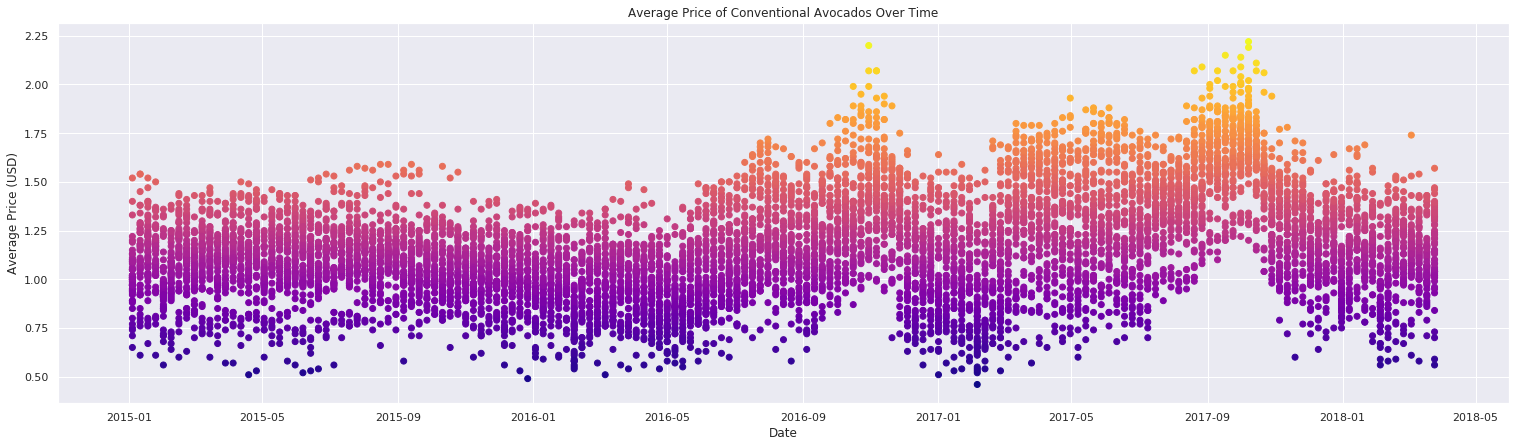

In [9]:
conv = avocadoData["type"] == "conventional"
fig = plt.figure(figsize = (26, 7))
plt.scatter(x=avocadoData[conv].Date, y=avocadoData[conv].AveragePrice, c=avocadoData[conv].AveragePrice, cmap="plasma")
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of Conventional Avocados Over Time")
plt.show()

* In the below visualization we are interested to see if there are any trends that occur with the prices of organic avocados over a period of time.

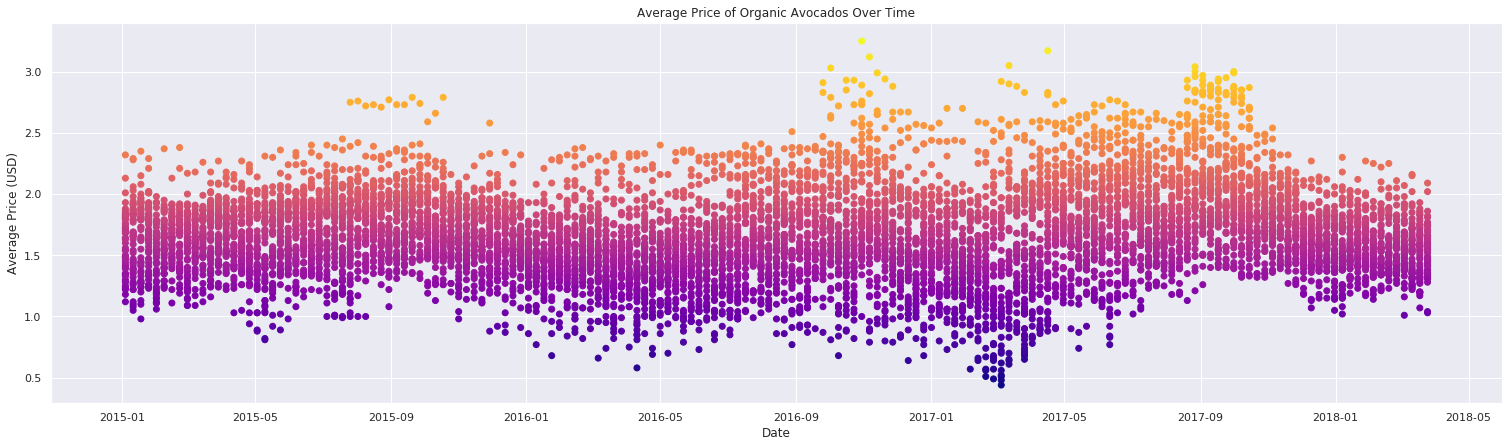

In [10]:
org = avocadoData["type"] == "organic"
fig = plt.figure(figsize = (26, 7))
plt.scatter(x=avocadoData[org].Date, y=avocadoData[org].AveragePrice, c=avocadoData[org].AveragePrice, cmap="plasma")
plt.xlabel("Date")
plt.ylabel("Average Price (USD)")
plt.title("Average Price of Organic Avocados Over Time")
plt.show()

### Observations
* Looks like every year avocado's are most expensive between August - November.
* There is a steep rise in the price in 2017.
* December - February seems to be the best months to purchase avocado's.

### Average Prices by regions

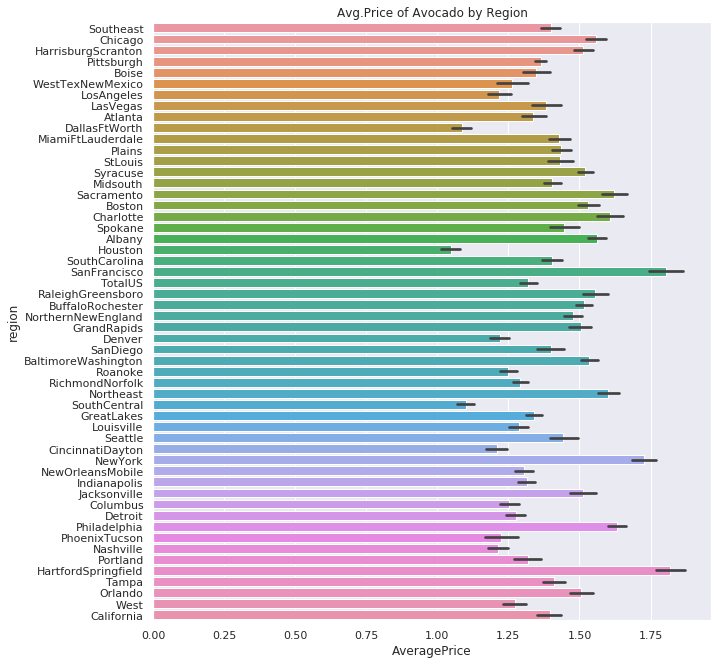

In [11]:
plt.figure(figsize=(10, 11))
ax = sns.barplot(x="AveragePrice", y="region", data= avocadoData)
plt.title("Avg.Price of Avocado by Region")
plt.show()

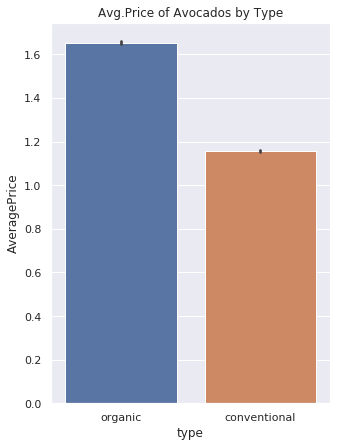

In [12]:
plt.figure(figsize=(5, 7))
ax = sns.barplot(x="type", y="AveragePrice", data= avocadoData)
plt.title("Avg.Price of Avocados by Type")
plt.show()

### Correlation
There is high correlation between:
* 4046 & total volume. 
* 4225 & total volume.
* 4770 & total volume.
* Total bags & total volume.
* Small bags & total bags.
* We can observe that 4046 avocados are the most sold type in US.
* Since there is high correlation between Total Bags, Total Volume & Small bags, 
  we assume most sales comes from small bags.

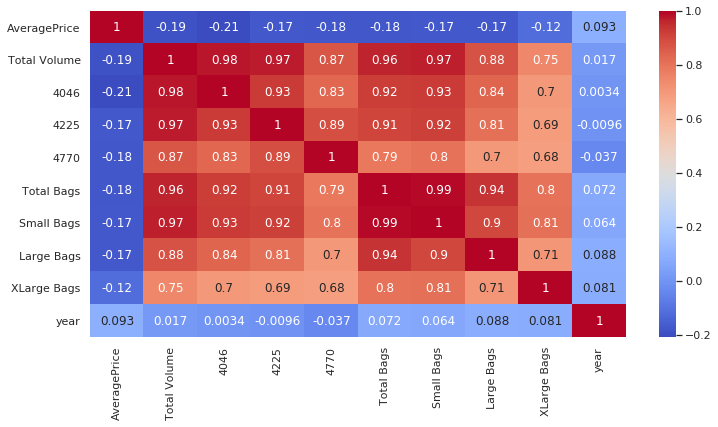

In [13]:
plt.figure(figsize=(12, 6))
sns.heatmap(avocadoData.corr(numeric_only=True), cmap='coolwarm', annot=True)
plt.show()

As we can from the heatmap above, all the Features are not correlated with the Average Price column, instead most of them are correlated with each other. 

In [1]:
# Features of interest.

features = ["4046", "4225", "4770", "Small Bags", "Large Bags", "XLarge Bags", "type", "year", "region"]

In [15]:
# Split data into features (X) and targets (y).

X = avocadoData[features]
y = avocadoData["AveragePrice"]
y = np.log1p(y)

In [19]:
# Utility functions for onehot encoding.

def one_hot_encode(data, dimensions, drop=False):
    data = data.copy()
    for dim in dimensions:
        if(type(data.iloc[:,dim].values[0]) == str):
            uniq = data.iloc[:, dim].unique()
            for val in uniq:
                data[f"{data.columns[dim]}_{val}"] = data.iloc[:,dim].apply(lambda x: 1 if x == val else 0)
    if drop:
        data.drop(data.columns[dimensions], axis=1, inplace=True)
    return data

### Handling Categorical Features

* One hot encoding is used to to perform “binarization” of the category and include it as a feature to train the model.
* As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type & regions

In [20]:
X = one_hot_encode(X, [6,8], True)

### Train Test Split

The dataset has to be split into a training set and a test set. Here the dataset has 18249 observations and the testRatio is taken as 20% of the total observations. This indicates the test set should have 20% * 18249 = 3649 observations and training test should have 14600 observations respectively.

In [22]:
train_len = len(X)
train_idxs = list(range(train_len))
np.random.shuffle(train_idxs)
split = int(np.floor(0.2 * train_len))
Xtest = X.iloc[:split, :].values
Xtrain = X.iloc[split:, :].values
ytest = y.iloc[:split].values
ytrain = y.iloc[split:].values

### Training the linear model

Regression analysis is the most widely used method of prediction. Linear regression is used when the dataset has a linear correlation and as the name suggests, multiple linear regression has one independent variable (predictor) and one or more dependent variable(response).

The simple linear regression equation is represented as y = $a + b_{1}x_{1} + b_{2}x_{2} + b_{3}x_{3} + ... + b_{n}x_{n}$ where $x_{i}$ is the ith explanatory variable, y is the dependent variable, $b_{i}$ is ith coefficient and a is the intercept.

To perform linear regression we'll be using `LinearRegression()` api from mlpack.

In [23]:
# Create and train Linear Regression model.
model = mlpack.LinearRegression(lambda_=0.5, verbose=True)

In [24]:
output_model = model.fit(training=Xtrain, training_responses=ytrain)

### Making Predictions on Test set

In [25]:
# Predict the values of the test data.
output_predictions = model.predict(test=Xtest)

In [26]:
yPreds = output_predictions.reshape(-1, 1).squeeze()

### Model Evaluation
Test data is visualized with `yTest` and `yPreds`, the blue points indicates the data points and the blue line indicates the regression line or best fit line.

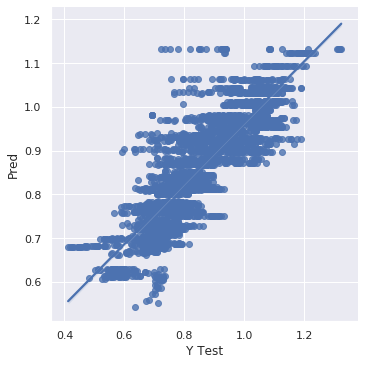

In [28]:
data = pd.DataFrame({'Y Test':ytest , 'Pred':yPreds},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test', y='Pred', data=data, palette='rainbow')
plt.show()

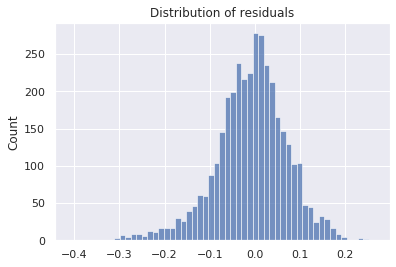

In [33]:
plt.figure(figsize=(6, 4))
sns.histplot(ytest - yPreds)
plt.title("Distribution of residuals")
plt.show()

## Evaluation Metrics for Regression model

In the Previous cell we have visualized our model performance by plotting the best fit line. Now we will use various evaluation metrics to understand how well our model has performed.

* Mean Absolute Error (MAE) is the sum of absolute differences between actual and predicted values, without considering the direction.
$$ MAE = \frac{\sum_{i=1}^n\lvert y_{i} - \hat{y_{i}}\rvert} {n} $$
* Mean Squared Error (MSE) is calculated as the mean or average of the squared differences between predicted and expected target values in a dataset, a lower value is better
$$ MSE = \frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2 $$
* Root Mean Squared Error (RMSE), Square root of MSE yields root mean square error (RMSE) it indicates the spread of the residual errors. It is always positive, and a lower value indicates better performance.
$$ RMSE = \sqrt{\frac {1}{n} \sum_{i=1}^n (y_{i} - \hat{y_{i}})^2} $$

In [36]:
# Utility functions for evaulation metrics.

def mae(y_true, y_preds):
    return np.mean(np.abs(y_preds - y_true))

def mse(y_true, y_preds):
    return np.mean(np.power(y_preds - y_true, 2))

In [37]:
print("---- Evaluation Metrics ----")
print(f"Mean Absolute Error: {mae(ytest, yPreds):.2f}")
print(f"Mean Squared Error: {mse(ytest, yPreds):.2f}")
print(f"Root Mean Squared Error: {np.sqrt(mse(ytest, yPreds)):.2f}")

---- Evaluation Metrics ----
Mean Absoulte Error: 0.06
Mean Squared Error: 0.01
Root Mean Squared Error: 0.08


From the above metrics, we can notice that our model MAE is ~0.06, which is relatively small compared to our average price of $1.405, from this and the above plot we can conclude our model is a reasonably good fit.